# babyIAXO
Same as the IAXO results except only has 1 bore and the length is 10 metres not 20. 

In [33]:
from numpy import *
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import AxionFuncs
import Like

gname = 'Photon'

# Number of mass points for discovery limits
n_DL = 1000
m_DL_vals = logspace(log10(1e-3),log10(2e-1),n_DL)

# Number of mass points for data table 
nm = 1000 
m_vals = logspace(-4.0,2e0,nm)

# Energy range for binned data
E_max = 20.0 # Max energy (20 keV for photon, 10 keV for electron)
nE_bins = 300 # Number of bins (needs to be >100 to get good results)
E0 = 1.0e-3*10.0 # Range of energy resolutions for the plot

# Generate IAXO limit
# I've turned off energy res here just for speed
E_bins,R1_tab,R0 = AxionFuncs.BinnedPhotonNumberTable(m_vals,E0,E_max,nE_bins,coupling=gname,nfine=10,res_on=False)
DLIAXO = Like.MassDiscoveryLimit_Simple(m_vals,R1_tab,R0,m_DL_vals)
IAXO = Like.ConstantObsNumberLine(5,m_DL_vals,m_vals,R1_tab)

# Generate babyIAXO limit
E_bins,R1_tab,R0 = AxionFuncs.BinnedPhotonNumberTable(m_vals,E0,E_max,nE_bins,coupling=gname,nfine=10,res_on=False,\
                                                     Length=10.0,N_bores=1,Exposure=1.0) # <- babyIAXO params (only need to set)
DL = Like.MassDiscoveryLimit_Simple(m_vals,R1_tab,R0,m_DL_vals)
babyIAXO = Like.ConstantObsNumberLine(5,m_DL_vals,m_vals,R1_tab)

print 'Done.'    

Done.


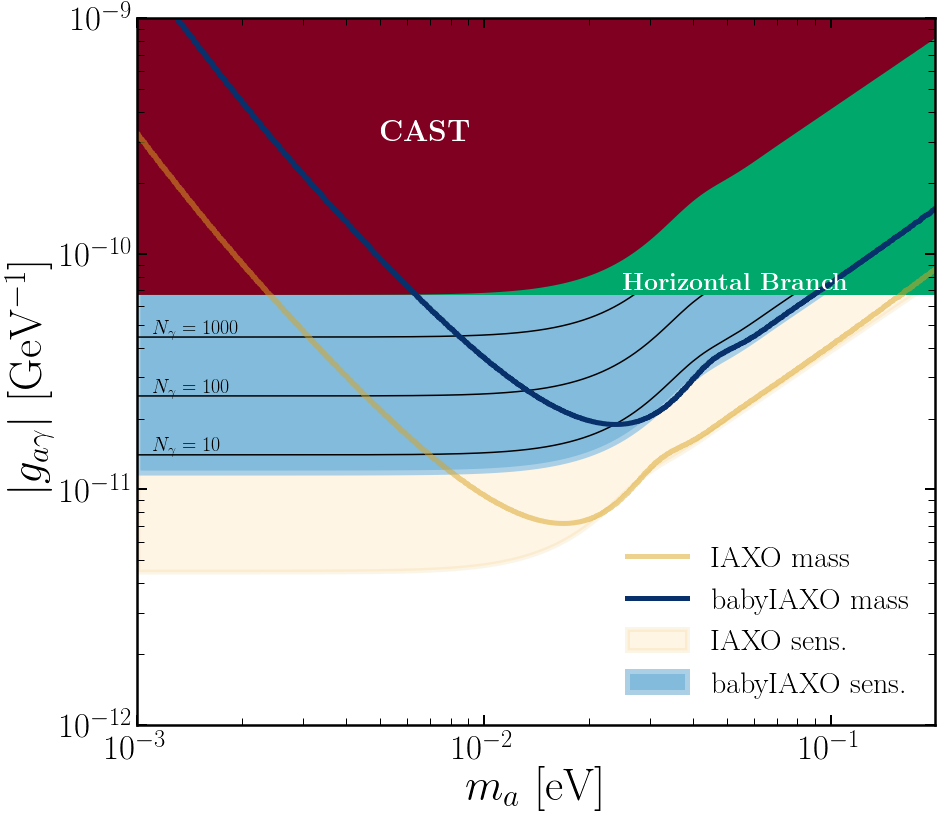

In [51]:
# Set various plotting style things
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(14.3,13))
ax = fig.add_subplot(111)

# Limits for y-axis
ymin = 1e-12
ymax = 1e-9


# blue
col = flipud(cm.Blues(linspace(0,1,10)))


# Plot IAXO limit
plt.fill_between(m_DL_vals,IAXO,y2=ymax,edgecolor="goldenrod",facecolor="Orange",alpha=0.1,linewidth=5,label=r'IAXO sens.',zorder=0)
plt.loglog(m_DL_vals,DLIAXO,'-',linewidth=5,color="goldenrod",alpha=0.5,label=r'IAXO mass')

# Plot babyIAXO limit
plt.fill_between(m_DL_vals,babyIAXO,y2=ymax,edgecolor=col[6,:],facecolor=col[5,:],linewidth=5,label=r'babyIAXO sens.',zorder=0)
plt.loglog(m_DL_vals,DL,linewidth=5,color=col[0,:],label=r'babyIAXO mass')

# Testing result makes sense by rescaling babyIAXO to recover IAXO
#mass_rescale = sqrt(20.0/10.0) # rescaled by length
#coupling_rescale = (((20/10)**2)*(8/1)*(1.5/1))**0.25 # rescaled by number of bores, exposure and length
#plt.loglog(m_DL_vals/mass_rescale,babyIAXO/coupling_rescale,'r:')
#plt.loglog(m_DL_vals/mass_rescale,DL/coupling_rescale,'r:')

# Plot constant event numbers lines
for Ngamma in [10,100,1000]:
    Nline = Like.ConstantObsNumberLine(Ngamma,m_DL_vals,m_vals,R1_tab)
    plt.loglog(m_DL_vals,Nline,'k-',zorder=0)
    plt.text(1.1e-3,Nline[0]*1.01,r'$N_\gamma$ = '+str(Ngamma),fontsize=20)
    
# HB limit
HB_col = [0.0, 0.66, 0.42]
HBmin = 6.7e-11
plt.fill_between([1e-3,1e0],[HBmin,HBmin],y2=ymax,edgecolor=None,facecolor=HB_col)
plt.text(2.5e-2,7e-11,r'{\bf Horizontal Branch}',fontsize=25,color='w')

# CAST limit
CAST_col = [0.5, 0.0, 0.13]
CAST = (babyIAXO/babyIAXO[0])*6.7e-11
plt.fill_between(m_DL_vals,CAST,y2=ymax,edgecolor=None,facecolor=CAST_col)
plt.text(5e-3,3e-10,r'{\bf CAST}',fontsize=30,color='w')
  
# Plot g \propto m^(-1.74) line
#plt.plot(m_DL_vals,1.8e-15*m_DL_vals**-1.74,'k--',linewidth=3)
#plt.text(1.8e-2,2.1e-12,r'$\propto m_a^{-1.74}$',fontsize=30,rotation=-50)

# Style
plt.xlim([m_DL_vals[0],m_DL_vals[-1]])
plt.ylim([ymin,ymax])
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax.tick_params(axis='x', which='major', pad=10)
plt.xlabel(r"$m_a$ [eV]",fontsize=45)
plt.ylabel(r"$|g_{a\gamma}|$ [GeV$^{-1}$]",fontsize=45)
# Legend
leg = plt.legend(fontsize=30,frameon=False,loc="lower right")
plt.setp(leg.get_title(),fontsize=30)

# Show and save
plt.show()
fig.savefig('../plots/MassDiscoveryLimit_babyIAXO.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/MassDiscoveryLimit_babyIAXO.png',bbox_inches='tight') # Save for preview in README

# Save data for other plots
savetxt("../my_data/MassDiscoveryLimit_babyIAXO.txt",vstack((m_DL_vals,DL)))


In [50]:
# Scaling for TASTE https://arxiv.org/abs/1706.09378
# B = 3.5
# L = 12
# Exposure = 1.5
# Nbores = 1
mass_rescale = sqrt(20.0/12.0) # rescaled by length
coupling_rescale = (((2.5/3.5)**2.0*(20/12)**2)*(8/1)*(1.5/1.5))**0.25 # rescaled by number of bores, exposure and length
print mass_rescale,coupling_rescale

1.29099444874 1.42137436628
